# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

In [ ]:
sns.pairplot(df, hue='left', palette='Set2')
plt.show()

#Cleaning

In [ ]:
unique_depts = df['Department'].unique()
print(unique_depts)

unique_sal = df['salary'].unique()
print(unique_sal)

In [ ]:
df = pd.read_excel('HR_Employee_Data.xlsx')


In [3]:
# Separate the 'left' column from the rest of the DataFrame
left_column = df.pop('left')

# Handle categorical variables: 'Department' and 'salary'
df = pd.get_dummies(df, columns=['Department', 'salary'])

# Re-include the 'left' column in the DataFrame
df['left'] = left_column

# Check for and handle missing values if any
df.dropna(inplace=True)

df = df.drop(['Emp_Id'], axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,False,False,False,...,False,False,False,True,False,False,False,True,False,1
1,0.80,0.86,5,262,6,0,0,False,False,False,...,False,False,False,True,False,False,False,False,True,1
2,0.11,0.88,7,272,4,0,0,False,False,False,...,False,False,False,True,False,False,False,False,True,1
3,0.72,0.87,5,223,5,0,0,False,False,False,...,False,False,False,True,False,False,False,True,False,1
4,0.37,0.52,2,159,3,0,0,False,False,False,...,False,False,False,True,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,False,False,False,...,False,False,False,False,True,False,False,True,False,1
14995,0.37,0.48,2,160,3,0,0,False,False,False,...,False,False,False,False,True,False,False,True,False,1
14996,0.37,0.53,2,143,3,0,0,False,False,False,...,False,False,False,False,True,False,False,True,False,1
14997,0.11,0.96,6,280,4,0,0,False,False,False,...,False,False,False,False,True,False,False,True,False,1


In [ ]:
df.info()

A pairplot is a grid of scatterplots showing the relationship between pairs of variables in a dataset.

In [ ]:
sns.pairplot(df, hue='left', palette='Set2')
plt.show()

In [ ]:
# df['left'] = df['left'].astype('category')

# df['left'] = df['left'].astype(bool)

sns.pairplot(df, hue='left', palette='Set1')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


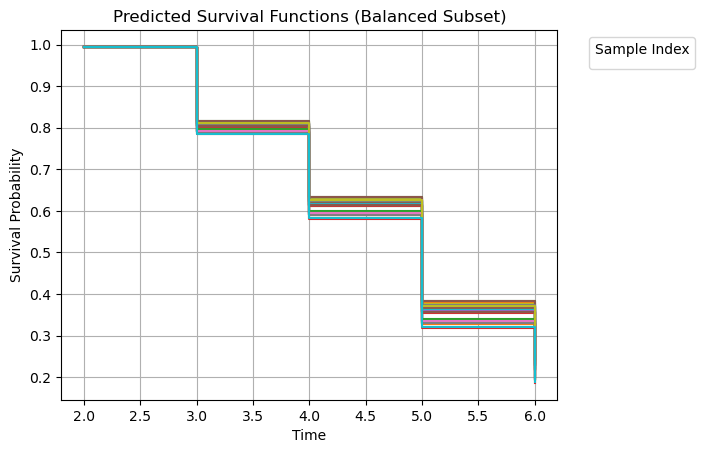

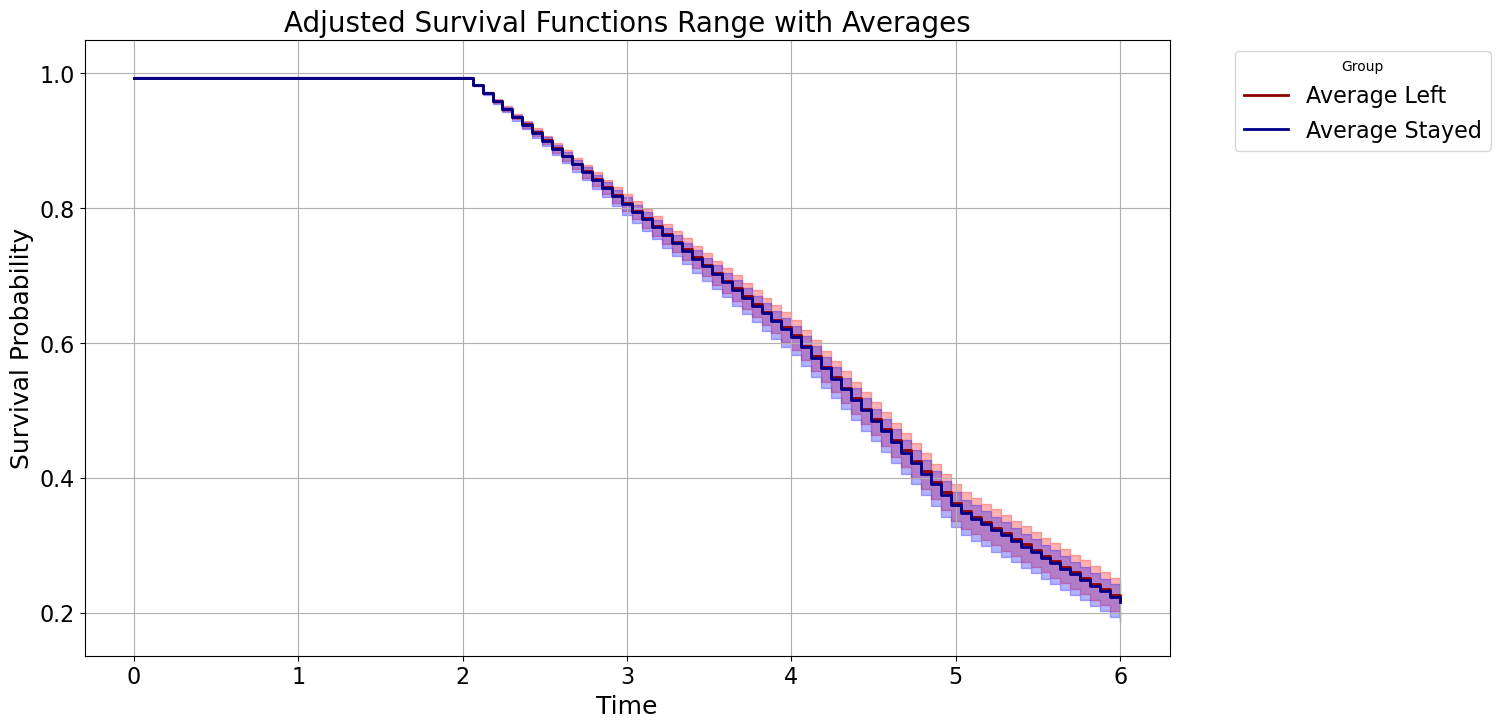

In [77]:
import numpy as np
import pandas as pd
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.util import Surv
import matplotlib.pyplot as plt

# Assume 'df' is your already one-hot encoded pandas DataFrame
time_col = 'time_spend_company'  # The time column in your dataset
event_col = 'left'               # The event column in your dataset (1 if event occurred, 0 otherwise)

# Convert the DataFrame to a NumPy array, but only include numeric and boolean data
numeric_df = df.select_dtypes(include=[np.number, 'bool'])

# Prepare the survival data
survival_y = Surv.from_dataframe(event_col, time_col, df)

# Initialize CoxnetSurvivalAnalysis with elastic net regularization
cox_elastic_net = CoxnetSurvivalAnalysis(l1_ratio=0.5, alpha_min_ratio=0.01, n_alphas=100, max_iter=100, fit_baseline_model=True)

# Fit the model
numeric_df_subset = numeric_df.iloc[:5000]
survival_y_subset = survival_y[:5000]
cox_elastic_net.fit(numeric_df_subset, survival_y_subset)

# Split the data into those who left and those who didn't
left_df = numeric_df[df[event_col] == 1]
stayed_df = numeric_df[df[event_col] == 0]

# Sample a balanced number from each group
sample_size = min(len(left_df), len(stayed_df), 20)  # Take 10 or the smallest group size
balanced_left = left_df.sample(n=sample_size)
balanced_stayed = stayed_df.sample(n=sample_size)

# Combine these samples into a new balanced dataset for plotting
balanced_new_data = pd.concat([balanced_left, balanced_stayed])

# Predicting the survival function for the balanced new data
predicted_balanced_survival = cox_elastic_net.predict_survival_function(balanced_new_data)

# Plot each survival function from the balanced dataset
for i, surv_func in enumerate(predicted_balanced_survival):
    plt.step(surv_func.x, surv_func.y, where="post")

plt.title('Predicted Survival Functions (Balanced Subset)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Sample Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

predicted_left_survival = cox_elastic_net.predict_survival_function(balanced_left)
predicted_stayed_survival = cox_elastic_net.predict_survival_function(balanced_stayed)

times = np.linspace(0, max(max(func.x[-1] for func in predicted_left_survival), max(func.x[-1] for func in predicted_stayed_survival)), 100)

# Calculate the minimum, maximum, and average survival probabilities at each time point for each group
min_surv_left = np.min([np.interp(times, func.x, func.y) for func in predicted_left_survival], axis=0)
max_surv_left = np.max([np.interp(times, func.x, func.y) for func in predicted_left_survival], axis=0)
avg_surv_left = np.mean([np.interp(times, func.x, func.y) for func in predicted_left_survival], axis=0)

min_surv_stayed = np.min([np.interp(times, func.x, func.y) for func in predicted_stayed_survival], axis=0)
max_surv_stayed = np.max([np.interp(times, func.x, func.y) for func in predicted_stayed_survival], axis=0)
avg_surv_stayed = np.mean([np.interp(times, func.x, func.y) for func in predicted_stayed_survival], axis=0)

global_min_survival = min(min_surv_left.min(), min_surv_stayed.min())

# Set the size of the plot
plt.figure(figsize=(14, 8))  # Adjust for better visibility

# Plot the areas between the minimum and maximum survival functions for each group
plt.fill_between(times, min_surv_left, max_surv_left, step="post", color='red', alpha=0.3)
plt.fill_between(times, min_surv_stayed, max_surv_stayed, step="post", color='blue', alpha=0.3)

# Plot the average survival functions
plt.step(times, avg_surv_left, where="post", label="Average Left", color='darkred', linewidth=2)
plt.step(times, avg_surv_stayed, where="post", label="Average Stayed", color='darkblue', linewidth=2)

# Set title, labels, legend, and grid for better visibility
plt.title('Adjusted Survival Functions Range with Averages', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Survival Probability', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.grid(True)

# Adjust Y-axis to start from global minimum survival probability minus a small buffer to enhance visibility
plt.ylim([global_min_survival - 0.05, 1.05])  # Adjust Y-axis, add buffer for clarity

# Show the plot
plt.show()